### Data import, EDA
#### Add'l useful information here.
#### Date, event info, etc

In [1]:
# Import libraries

# Data exploration
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Read in the data. Remember to pass in the full file path!
data_df = pd.read_csv('data/commute_times.csv')

In [7]:
# Read in the first five rows of data.
data_df.head()

,source_latitude,source_longitude,destination_latitude,destination_longitude,time_of_day,commute_type,commute_time
0,0.824392,0.475742,0.933873,-0.292262,8.856115,TRAIN,1.028704
1,0.795889,0.075121,0.240722,0.465027,9.058129,BIKE,4.634294
2,-0.902398,0.124019,0.666059,-0.260070,8.524607,CAR,6.491592
3,0.496755,-0.747187,0.161702,0.385728,9.676583,BUS,5.415297
4,-0.085848,-0.914451,-0.058177,0.278478,14.784042,BUS,1.499639


In [8]:
# Other options include using .tail() and .sample(). You can specify how many rows of data to see. The default is 5. 
data_df.sample(3)

,source_latitude,source_longitude,destination_latitude,destination_longitude,time_of_day,commute_type,commute_time
3170,0.081357,-0.824304,0.290507,0.824113,8.733078,CAR,8.071357
2292,0.908957,0.366996,0.397665,0.500049,17.307699,BIKE,3.905998
2953,0.364320,-0.283388,-0.106586,-0.474085,8.694374,BUS,1.217630


In [10]:
# Other methods to use to get some information about your dataset. Using .describe() provides some summary statistics
# of what kind of data?
data_df.describe()

,source_latitude,source_longitude,destination_latitude,destination_longitude,time_of_day,commute_time
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.016989,-0.001112,0.008871,-0.003660,12.907481,5.916393
std,0.498398,0.496516,0.505529,0.493361,5.062629,7.377911
min,-0.993965,-0.994980,-0.993558,-0.993228,0.011903,0.026476
25%,-0.380178,-0.403628,-0.412769,-0.404136,8.255253,1.655486
50%,0.022520,0.014167,0.023954,-0.003991,12.615803,3.410380
75%,0.421327,0.393509,0.415439,0.392553,17.795765,7.256224
max,0.998154,0.995806,0.992540,0.992620,23.943038,98.085467


In [11]:
# There is a quick way to learn what size dataset you are working with. .shape will return (rows, columns).
data_df.shape

(5000, 7)

In [19]:
# It's important to know what data types are in your dataset! Never make assumptions about the data you are working
# with.
for col in data_df.columns:
    print(f'{col} - {data_df[col].dtype}')

source_latitude - float64
source_longitude - float64
destination_latitude - float64
destination_longitude - float64
time_of_day - float64
commute_type - object
commute_time - float64


In [20]:
# Is there any missing data in this dataset?
data_df.isnull().values.any()

False

In [24]:
# If there are NaNs, how many are there?
data_df.isnull().sum().sum()

0

In [25]:
# Let's start learning about the data through visualizations

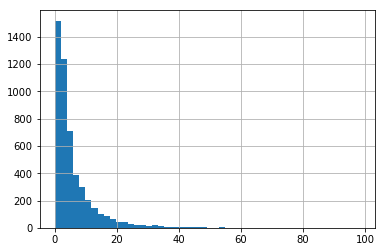

In [43]:
# This will tell you the frequency of commute times.
data_df['commute_time'].hist(bins=50);

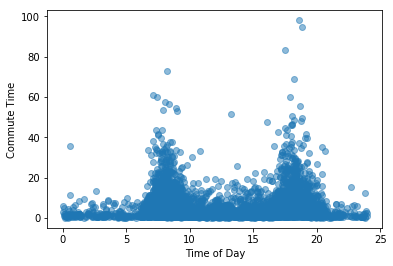

In [42]:
# How is commute time distributed by time of day?
plt.scatter(data_df['time_of_day'], data_df['commute_time'], alpha=0.5)
plt.xlabel('Time of Day')
plt.ylabel('Commute Time');

In [40]:
# This is a nice summary table, but let's graph this out somehow.
data_df.groupby('commute_type').size()

commute_type
BIKE      750
BUS      1645
CAR      1739
TRAIN     639
WALK      227
dtype: int64

In [44]:
# Need a bar graph of commute type

In [ ]:
# Need to fix x axis of graphs below

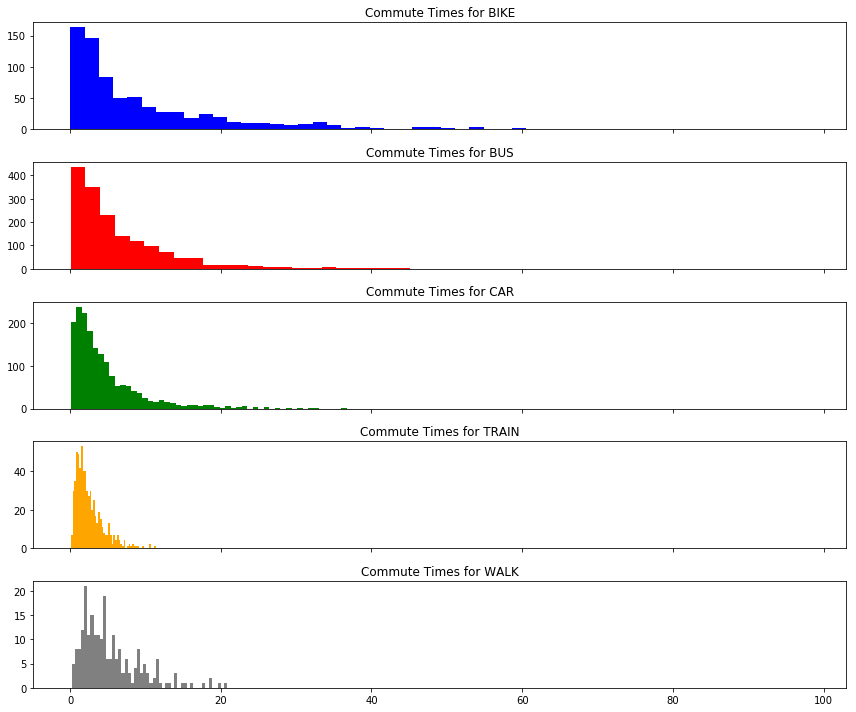

In [41]:
# Simplify for following
commute_type = data_df['commute_type']
commute_time = data_df['commute_time']

# Examine the distribution of commute times by commute types.
fig, axs = plt.subplots(5, 1, figsize=(12, 10), sharex=True)
colors = ['blue', 'red', 'green', 'orange', 'grey']

for ax, ctype, color in zip(axs, np.unique(commute_type), colors):
    ctime = commute_time[commute_type == ctype]
    ax.hist(ctime, bins=50, color=color)
    ax.set_title(f'Commute Times for {ctype}')
fig.tight_layout()

In [46]:
# Correlation plot?
# plt.xcorr()

In [45]:
# How to add to current data frame in the correct orientation? Know your axes.
data_df = pd.concat([data_df, pd.get_dummies(data_df['commute_type'])], axis=1)

In [ ]:
# 8/13/18
# Need new dataset for datetime objects (time_of_day_ts)
# If not randomly replacing with NaNs, will bring up topic and method to check for nans and ask about/discuss ways 
# to impute or drop data.
# For feature engineering, get_dummies was introduced above. What about log transforming commute time?
# 

#### What do you think those peaks represent? Could we use this information somehow?

In [ ]:
peak_commute = max(data_df['commute_time'])
peak_commute
# Not super useful...

In [ ]:
# This might be a bonus feature: distance (diff of time of day, timedelta?) of point to peak 
# Find the first peak
# For each point, determine which peak is closest to that point.
# Calculate the distance
first_peak = data_df['time_of_day']==

# How to do this?
# 1. Smooth the data and find deriv (pro: Have to deal with one peak, not 2!)
# 2. tmp dfs to split into 2 and find distance (what kind of distance?) to peak?
# 

In [ ]:
# Too complicated, stick with matplotlib. Look at Matt's
sns.lmplot(x='time_of_day', y='commute_time', hue = 'commute_type', data=data_df)

In [ ]:
# To add
# EDA steps (shape, describe, dtypes, head/tail/sample)
# Worthwhile concepts to introduce? colinearity and correlation plot? maybe too much in the weeds (bonus concept)
# Vizualizations: pandas vs introducing matplotlib & seaborn
# new features (L1, L2 distance; get dummies (this will also introduce concept of adding to df))
# What about transforming any of the current variables? eg log transform of commute time
# plotting (bar plot commute type, scatter/histo time of day -> facet = commute type)
# Bonus or plant seed for further exploration during hack time: map start and destination locations (choropleth?)?